# Feature Engineering of Sepsis Risk Classifier
In this notebook, we will merge the data files in preparation for machine learning.

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

### Input selection from Chart events
From  the massive CHARTEVENTS.csv file, we have extracted 5 chart features as inputs:
* Heart rate: ITEMID = 220045
* BP systolic: ITEMID = 220050
* BP diastolic: ITEMID = 220051
* Temperature F: ITEMID = 223761
* White blood count (WBC): ITEMID = 220546

The item codes are retrieved from D_ITEMS.csv

In [2]:
#!awk -F, '$6 == "220045" {print $4, $11 } ' x* > ../Heartrate_220045.csv
#!awk -F, '$6 == "220050" {print $4, $11 } ' x* > ../BPsys_220050.csv
#!awk -F, '$6 == "223761" {print $4, $11 } ' x* > ../BPdia_220051.csv
#!awk -F, '$6 == "223761" {print $4, $11 } ' x* > ../Temp_223761.csv
#!awk -F, '$6 == "220546" {print $4, $11 } ' x* > ../WBC_220546.csv

### Read in each Chart feature file to summarize

In [3]:
data_dir = 'MIMIC-data'
df_HR = pd.read_csv(os.path.join(data_dir,'Heartrate_220045.csv'), sep=' ', names=['HADM_ID','ITEMID','HR'])
df_BPsys = pd.read_csv(os.path.join(data_dir,'BPsys_220050.csv'), sep=' ', names=['HADM_ID','ITEMID','BPsys'])
df_BPdia = pd.read_csv(os.path.join(data_dir,'BPdia_220051.csv'), sep=' ', names=['HADM_ID','ITEMID','BPdia'])
df_Temp = pd.read_csv(os.path.join(data_dir,'Temp_223761.csv'), sep=' ', names=['HADM_ID','Temp'])
df_WBC = pd.read_csv(os.path.join(data_dir,'WBC_220546.csv'), sep=' ', names=['HADM_ID','WBC'])

In [4]:
#drop extra columns
df_HR = df_HR.drop(columns={'ITEMID'})
df_BPsys = df_BPsys.drop(columns={'ITEMID'})
df_BPdia = df_BPdia.drop(columns={'ITEMID'})

### Clean outliers

In [5]:
df_HR.describe()

,HADM_ID,HR
count,2.452223e+06,2.452223e+06
mean,1.497771e+05,8.786230e+01
std,2.826830e+04,5.836713e+01
min,1.000010e+05,-8.800000e+01
25%,1.268150e+05,7.400000e+01
50%,1.478540e+05,8.600000e+01
75%,1.746220e+05,1.000000e+02
max,1.999990e+05,8.610100e+04


In [6]:
# Limit HR values between 0 and 400
df_HR = df_HR[(df_HR.HR>0) & (df_HR.HR <400)]

In [7]:
df_BPsys.describe()

,HADM_ID,BPsys
count,960125.000000,960125.000000
mean,148872.313142,122.294217
std,27723.409007,135.357978
min,100009.000000,-11.000000
25%,127108.000000,104.000000
50%,145250.000000,119.000000
75%,171952.000000,138.000000
max,199962.000000,95119.040000


In [8]:
# Limit BP systolic values between 0 and 300
df_BPsys = df_BPsys[(df_BPsys.BPsys>0) & (df_BPsys.BPsys <300)]

In [9]:
df_BPdia.describe()

,HADM_ID,BPdia
count,959921.000000,959921.000000
mean,148871.554105,62.723033
std,27722.967106,365.344346
min,100009.000000,-16.000000
25%,127108.000000,51.000000
50%,145250.000000,59.000000
75%,171952.000000,69.000000
max,199962.000000,114099.980000


In [10]:
# Limit BP diastolic values between 0 and 300
df_BPdia = df_BPdia[(df_BPdia.BPdia>0) & (df_BPdia.BPdia <300)]

In [11]:
df_Temp.describe()

,HADM_ID,Temp
count,468636.000000,468636.000000
mean,149912.285452,98.421077
std,28750.647337,15.361171
min,100001.000000,-99.900000
25%,125190.000000,97.500000
50%,149795.000000,98.400000
75%,174972.000000,99.300000
max,199999.000000,9637.000000


In [12]:
# Limit body temperature values between 0 and 200
df_Temp = df_Temp[(df_Temp.Temp>0) & (df_Temp.Temp <200)]

In [13]:
df_WBC.describe()

,HADM_ID,WBC
count,116006.000000,116006.000000
mean,150037.553325,20.478011
std,28868.446725,2936.001878
min,100001.000000,0.000000
25%,125172.000000,7.400000
50%,149923.000000,10.300000
75%,175280.000000,14.300000
max,199999.000000,999999.000000


In [14]:
# Limit white blood counts between 0 and 500
df_WBC = df_WBC[(df_WBC.WBC>0) & (df_WBC.WBC <500)]

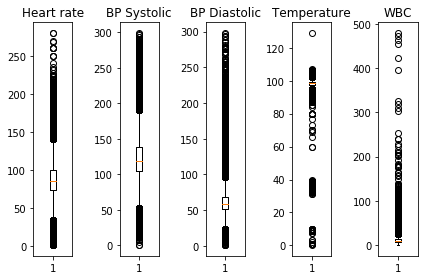

In [15]:
fig, axes = plt.subplots(1, 5)
axes[0].boxplot(df_HR.HR);
axes[0].set_title('Heart rate')
axes[1].boxplot(df_BPsys.BPsys);
axes[1].set_title('BP Systolic')
axes[2].boxplot(df_BPdia.BPdia);
axes[2].set_title('BP Diastolic')
axes[3].boxplot(df_Temp.Temp);
axes[3].set_title('Temperature')
axes[4].boxplot(df_WBC.WBC);
axes[4].set_title('WBC')
fig.tight_layout()

In [16]:
'''
Function to find the minimum and maximum values of the selected ItemID 
'''
def min_max(df, itemIDname, groupbycol):
    df_min = pd.DataFrame(df.groupby(groupbycol)[itemIDname].min())
    df_max = pd.DataFrame(df.groupby(groupbycol)[itemIDname].max())
    df_out=pd.merge(df_min, df_max, how='left', on=groupbycol)
    return df_out

In [17]:
df_HR_minmax = min_max(df_HR, 'HR', 'HADM_ID')

In [18]:
df_HR_minmax.head()

,HR_x,HR_y
HADM_ID,,
100001,75.0,131.0
100003,69.0,104.0
100009,49.0,92.0
100011,68.0,142.0
100012,67.0,109.0


### The above table stores the minimum and maximum heart rate recorded for a patient at each specific hospital admission.
### Repeat for the other input features.

In [19]:
df_BPsys_minmax = min_max(df_BPsys, 'BPsys', 'HADM_ID')
df_BPdia_minmax = min_max(df_BPdia, 'BPdia', 'HADM_ID')
df_Temp_minmax = min_max(df_Temp, 'Temp', 'HADM_ID')
df_WBC_minmax = min_max(df_WBC, 'WBC', 'HADM_ID')

### Merge into a single features file

In [20]:
df_features = pd.merge(df_HR_minmax, df_BPsys_minmax, how='outer', on='HADM_ID')
df_features = pd.merge(df_features, df_BPdia_minmax, how='outer', on='HADM_ID')
df_features = pd.merge(df_features, df_Temp_minmax, how='outer', on='HADM_ID')
df_features = pd.merge(df_features, df_WBC_minmax, how='outer', on='HADM_ID')
df_features.head()

,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y
HADM_ID,,,,,,,,,,
100001,75.0,131.0,NaN,NaN,NaN,NaN,97.5,100.0,6.1,15.9
100003,69.0,104.0,NaN,NaN,NaN,NaN,95.4,98.2,12.7,14.2
100009,49.0,92.0,98.0,132.0,48.0,60.0,NaN,NaN,17.3,17.3
100011,68.0,142.0,95.0,186.0,43.0,127.0,97.5,102.7,7.6,17.3
100012,67.0,109.0,88.0,151.0,45.0,75.0,97.0,99.3,6.9,14.1


In [21]:
df_features.describe()

,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y
count,18868.000000,18868.000000,7026.000000,7026.000000,7024.000000,7024.00000,18711.000000,18711.000000,20545.000000,20545.000000
mean,65.155872,110.948235,82.778178,163.299886,42.866031,95.19889,95.732730,99.639707,8.792479,13.797692
std,14.816087,23.607692,21.814062,30.434910,11.389377,32.49854,7.932311,2.640099,7.832908,11.491721
min,1.000000,39.000000,0.110000,11.000000,1.000000,6.00000,0.100000,31.400000,0.050000,0.100000
25%,56.000000,94.000000,72.000000,143.000000,36.000000,74.00000,96.000000,98.600000,5.800000,8.400000
50%,65.000000,109.000000,84.000000,161.000000,43.000000,88.00000,96.700000,99.400000,7.900000,11.800000
75%,74.000000,126.000000,95.000000,181.000000,49.000000,107.00000,97.400000,100.600000,10.500000,16.500000
max,141.000000,280.000000,196.000000,299.000000,102.000000,298.00000,104.000000,129.000000,471.700000,479.300000


### Notice that each input feature has different number of non-null values. After we trim the charts table for the admission records we are using for this analysis, we will need to take care of the null values.

## Extract patient info
From our earlier analysis, the features we need from the PATIENTS table are:
- the patient identifier (SUBJECT_ID)
- GENDER
- date of birth (DOB), which will be used to calculate patient's age at hospital admission. 

In [22]:
df_patient = pd.read_csv(os.path.join(data_dir,'PATIENTS.csv'))

In [23]:
df_patient.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [24]:
# extract only needed columns
df_patient = pd.read_csv(os.path.join(data_dir,'PATIENTS.csv'), 
                         usecols=['SUBJECT_ID','GENDER','DOB'])

In [25]:
df_patient.head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


## Extract admission info
In earlier analysis, we have determined to keep EMERGENCY and URGENT ADMISSION_TYPE data for sepsis analysis, since the other ADMISSION_TYPEs have very few Sepsis cases.

In [26]:
df_adm = pd.read_csv(os.path.join(data_dir,'ADMISSIONS_TRIM.csv'))

In [27]:
df_adm.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,False
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,False
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,False
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,False
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,False


## Merge data together

In [28]:
df_adm = pd.merge(df_adm,df_patient, how='left', on='SUBJECT_ID')

In [29]:
df_adm.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,False,F,2131-05-07 00:00:00
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,False,M,2082-07-17 00:00:00
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,False,M,2100-05-31 00:00:00
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,False,M,2101-11-21 00:00:00
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,False,M,2054-05-04 00:00:00


In [30]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43407 entries, 0 to 43406
Data columns (total 8 columns):
SUBJECT_ID        43407 non-null int64
HADM_ID           43407 non-null int64
ADMITTIME         43407 non-null object
DISCHTIME         43407 non-null object
ADMISSION_TYPE    43407 non-null object
SEPSIS_FLAG       43395 non-null object
GENDER            43407 non-null object
DOB               43407 non-null object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


### Remove few rows which neither answer True nor False to SEPSIS_FLAG 

In [31]:
df_adm[(df_adm.SEPSIS_FLAG != True) & (df_adm.SEPSIS_FLAG != False)]

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB
792,690,174817,2188-06-01 08:03:00,2188-06-01 23:59:00,EMERGENCY,NaN,M,2109-09-24 00:00:00
1505,1490,135580,2117-12-27 06:48:00,2117-12-27 23:59:00,EMERGENCY,NaN,F,2052-11-28 00:00:00
2876,3369,126808,2111-01-24 11:53:00,2111-01-25 22:40:00,EMERGENCY,NaN,M,2080-07-13 00:00:00
3583,5008,176430,2121-06-27 09:42:00,2121-06-27 23:59:00,URGENT,NaN,M,2093-04-20 00:00:00
15594,19620,137540,2163-01-05 23:55:00,2163-01-17 23:59:00,URGENT,NaN,F,2120-09-25 00:00:00
18957,21627,186284,2161-12-15 14:21:00,2161-12-21 16:43:00,URGENT,NaN,M,2097-07-25 00:00:00
21562,26443,147575,2183-01-13 20:19:00,2183-01-29 15:00:00,EMERGENCY,NaN,M,2096-04-22 00:00:00
24597,29096,182322,2103-01-08 17:22:00,2103-01-08 23:59:00,EMERGENCY,NaN,M,2020-11-13 00:00:00
26531,43749,162406,2111-11-23 09:49:00,2111-11-23 23:59:00,EMERGENCY,NaN,F,1811-11-23 00:00:00
26733,31935,135990,2131-07-22 06:57:00,2131-07-22 23:59:00,EMERGENCY,NaN,M,2074-05-08 00:00:00


### Remove the rows with undetermined SEPSIS_FLAG. Most likely these rows do not have any diagnosis.

In [32]:
df_adm = df_adm[(df_adm.SEPSIS_FLAG == True) | (df_adm.SEPSIS_FLAG == False)]

In [33]:
df_adm.groupby('SEPSIS_FLAG').count()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,GENDER,DOB
SEPSIS_FLAG,,,,,,,
False,41613,41613,41613,41613,41613,41613,41613
True,1782,1782,1782,1782,1782,1782,1782


In [34]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43395 entries, 0 to 43406
Data columns (total 8 columns):
SUBJECT_ID        43395 non-null int64
HADM_ID           43395 non-null int64
ADMITTIME         43395 non-null object
DISCHTIME         43395 non-null object
ADMISSION_TYPE    43395 non-null object
SEPSIS_FLAG       43395 non-null object
GENDER            43395 non-null object
DOB               43395 non-null object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


### Merge the admission-patient data to the features data frame

In [35]:
df_features = pd.merge(df_adm,df_features, how='left', on='HADM_ID')

In [36]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43395 entries, 0 to 43394
Data columns (total 18 columns):
SUBJECT_ID        43395 non-null int64
HADM_ID           43395 non-null int64
ADMITTIME         43395 non-null object
DISCHTIME         43395 non-null object
ADMISSION_TYPE    43395 non-null object
SEPSIS_FLAG       43395 non-null object
GENDER            43395 non-null object
DOB               43395 non-null object
HR_x              18868 non-null float64
HR_y              18868 non-null float64
BPsys_x           7026 non-null float64
BPsys_y           7026 non-null float64
BPdia_x           7024 non-null float64
BPdia_y           7024 non-null float64
Temp_x            18711 non-null float64
Temp_y            18711 non-null float64
WBC_x             20545 non-null float64
WBC_y             20545 non-null float64
dtypes: float64(10), int64(2), object(6)
memory usage: 6.3+ MB


In [37]:
df_features[df_features.SEPSIS_FLAG==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 7 to 43378
Data columns (total 18 columns):
SUBJECT_ID        1782 non-null int64
HADM_ID           1782 non-null int64
ADMITTIME         1782 non-null object
DISCHTIME         1782 non-null object
ADMISSION_TYPE    1782 non-null object
SEPSIS_FLAG       1782 non-null object
GENDER            1782 non-null object
DOB               1782 non-null object
HR_x              695 non-null float64
HR_y              695 non-null float64
BPsys_x           253 non-null float64
BPsys_y           253 non-null float64
BPdia_x           253 non-null float64
BPdia_y           253 non-null float64
Temp_x            690 non-null float64
Temp_y            690 non-null float64
WBC_x             748 non-null float64
WBC_y             748 non-null float64
dtypes: float64(10), int64(2), object(6)
memory usage: 264.5+ KB


### As noted earlier, some of the features are null. 
Replace the null values with -1. 

In [38]:
df_features = df_features.fillna(-1)

In [39]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43395 entries, 0 to 43394
Data columns (total 18 columns):
SUBJECT_ID        43395 non-null int64
HADM_ID           43395 non-null int64
ADMITTIME         43395 non-null object
DISCHTIME         43395 non-null object
ADMISSION_TYPE    43395 non-null object
SEPSIS_FLAG       43395 non-null bool
GENDER            43395 non-null object
DOB               43395 non-null object
HR_x              43395 non-null float64
HR_y              43395 non-null float64
BPsys_x           43395 non-null float64
BPsys_y           43395 non-null float64
BPdia_x           43395 non-null float64
BPdia_y           43395 non-null float64
Temp_x            43395 non-null float64
Temp_y            43395 non-null float64
WBC_x             43395 non-null float64
WBC_y             43395 non-null float64
dtypes: bool(1), float64(10), int64(2), object(5)
memory usage: 6.0+ MB


### Convert categorial data to numerical data
- GENDER: M = 1, F = 0

In [40]:
df_features['GENDER'].value_counts()

M    24165
F    19230
Name: GENDER, dtype: int64

In [41]:
df_features.head(10)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,False,F,2131-05-07 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,False,M,2082-07-17 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,False,M,2100-05-31 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,False,M,2101-11-21 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,False,M,2054-05-04 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,False,M,1872-10-14 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,False,M,2036-05-17 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,33,176176,2116-12-23 22:30:00,2116-12-27 12:05:00,EMERGENCY,True,M,2034-08-02 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,False,M,1886-07-18 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,EMERGENCY,False,M,1886-07-18 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [42]:
df_features.loc[:,'GENDER'].replace({'M':1,'F':0}, inplace=True)
df_features.head(10)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,False,0,2131-05-07 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,False,1,2082-07-17 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,False,1,2100-05-31 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,False,1,2101-11-21 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,False,1,2054-05-04 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,False,1,1872-10-14 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,False,1,2036-05-17 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,33,176176,2116-12-23 22:30:00,2116-12-27 12:05:00,EMERGENCY,True,1,2034-08-02 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,False,1,1886-07-18 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,EMERGENCY,False,1,1886-07-18 00:00:00,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Calculate age at admission 

In [43]:
from datetime import date
df_features['ADMITTIME'] = pd.to_datetime(df_features['ADMITTIME'])
df_features['DOB'] = pd.to_datetime(df_features['DOB'])
df_features['AGE'] = (df_features['ADMITTIME'].subtract(df_features['DOB'])).dt.days //365
df_features.head()


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,EMERGENCY,False,0,2131-05-07,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,64
1,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,False,1,2082-07-17,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,75
2,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,EMERGENCY,False,1,2100-05-31,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39
3,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,False,1,2101-11-21,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,58
4,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,EMERGENCY,False,1,2054-05-04,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,72


In [44]:
df_features['AGE'].describe()

count    43395.000000
mean        41.514575
std         82.504787
min       -285.000000
25%         47.000000
50%         62.000000
75%         75.000000
max         89.000000
Name: AGE, dtype: float64

### Noted negative ages

In [45]:
df_features[df_features['AGE']<0]

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,SEPSIS_FLAG,GENDER,DOB,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
5,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,False,1,1872-10-14,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
8,34,115799,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,False,1,1886-07-18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
9,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,EMERGENCY,False,1,1886-07-18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-281
29,368,105889,2137-07-11 17:56:00,2137-07-16 16:00:00,EMERGENCY,False,1,1837-07-11,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
30,368,138061,2139-12-16 19:48:00,2139-12-22 16:15:00,EMERGENCY,False,1,1837-07-11,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-283
42,56,181711,2104-01-02 02:01:00,2104-01-08 10:30:00,EMERGENCY,False,0,1804-01-02,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
112,149,154869,2135-02-18 19:16:00,2135-02-26 17:00:00,EMERGENCY,False,0,1835-02-18,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
114,151,151029,2145-05-06 20:00:00,2145-05-15 17:30:00,EMERGENCY,False,0,1845-05-06,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
146,112,174105,2194-06-13 18:39:00,2194-06-18 16:50:00,EMERGENCY,False,1,1894-06-13,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-285
147,112,173177,2196-09-27 18:21:00,2196-09-29 00:15:00,EMERGENCY,False,1,1894-06-13,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-283


In [46]:
df_features[df_features['AGE']<0].groupby('SEPSIS_FLAG').count()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,GENDER,DOB,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
SEPSIS_FLAG,,,,,,,,,,,,,,,,,,
False,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370,2370
True,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135


### NOT IMPLEMENTED Date shifted date of birth
There are negative ages, because according to the MIMIC-III documentation:<br>
"DOB is the date of birth of the given patient. Patients who are older than 89 years old at any time in the database have had their date of birth shifted to obscure their age and comply with HIPAA. The shift process was as follows: the patient’s age at their first admission was determined. The date of birth was then set to exactly 300 years before their first admission." <br>
<br>
A significant number of such cases exists, that is, patient is older than 89 years in the database. We will try to recover these data if possible.
If negative age is resulted, add 300 years to the negative age.

In [47]:
# Tentatively negative age to be 90
df_features.loc[df_features.AGE <0, ['AGE']] = 90
df_features.describe()

,SUBJECT_ID,HADM_ID,GENDER,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
count,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000
mean,36418.067911,149987.051895,0.556861,27.764351,47.674716,12.564362,25.601475,6.100242,14.570941,40.709094,42.393699,3.636168,6.005844,63.134117
std,28953.832266,28933.396503,0.496762,34.220020,57.638585,32.085243,61.749657,16.794222,37.767882,48.188884,49.871621,7.276887,10.821768,18.406901
min,3.000000,100001.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,13074.000000,124885.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,51.000000
50%,26290.000000,150047.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,65.000000
75%,59596.500000,175050.500000,1.000000,62.000000,104.000000,-1.000000,-1.000000,-1.000000,-1.000000,96.400000,99.200000,7.600000,11.400000,78.000000
max,99992.000000,199999.000000,1.000000,141.000000,280.000000,196.000000,299.000000,102.000000,298.000000,104.000000,129.000000,471.700000,479.300000,90.000000


### Drop columns that are not feature inputs

In [48]:
# Drop the ID columns and admit and discharge times, DOB, ADMISSION_TYPE
df_features = df_features.drop(columns=['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DOB','ADMISSION_TYPE'])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43395 entries, 0 to 43394
Data columns (total 13 columns):
SEPSIS_FLAG    43395 non-null bool
GENDER         43395 non-null int64
HR_x           43395 non-null float64
HR_y           43395 non-null float64
BPsys_x        43395 non-null float64
BPsys_y        43395 non-null float64
BPdia_x        43395 non-null float64
BPdia_y        43395 non-null float64
Temp_x         43395 non-null float64
Temp_y         43395 non-null float64
WBC_x          43395 non-null float64
WBC_y          43395 non-null float64
AGE            43395 non-null int64
dtypes: bool(1), float64(10), int64(2)
memory usage: 4.3 MB


### Check for correlated features 
Correlation values of 0 to 1 map from low to high correlation.

In [49]:
correlation_matrix = df_features.corr().abs().round(2)
display(correlation_matrix)

,SEPSIS_FLAG,GENDER,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
SEPSIS_FLAG,1.00,0.01,0.01,0.01,0.02,0.01,0.02,0.01,0.02,0.02,0.00,0.02,0.04
GENDER,0.01,1.00,0.01,0.01,0.03,0.03,0.03,0.02,0.00,0.00,0.00,0.00,0.09
HR_x,0.01,0.01,1.00,0.94,0.43,0.42,0.43,0.40,0.95,0.95,0.58,0.57,0.00
HR_y,0.01,0.01,0.94,1.00,0.50,0.53,0.51,0.52,0.95,0.96,0.57,0.62,0.01
BPsys_x,0.02,0.03,0.43,0.50,1.00,0.95,0.98,0.89,0.46,0.48,0.29,0.40,0.02
BPsys_y,0.01,0.03,0.42,0.53,0.95,1.00,0.94,0.96,0.47,0.49,0.29,0.44,0.02
BPdia_x,0.02,0.03,0.43,0.51,0.98,0.94,1.00,0.91,0.46,0.48,0.29,0.41,0.00
BPdia_y,0.01,0.02,0.40,0.52,0.89,0.96,0.91,1.00,0.45,0.47,0.27,0.43,0.01
Temp_x,0.02,0.00,0.95,0.95,0.46,0.47,0.46,0.45,1.00,0.99,0.58,0.59,0.03
Temp_y,0.02,0.00,0.95,0.96,0.48,0.49,0.48,0.47,0.99,1.00,0.59,0.60,0.03


### Observation
High correlation is noticed between each pair of maximum and minimum values. It is also noticed between heart rate (HR) and body temperature (Temp).

### Write datasets to csv

In [50]:
# backup features file
df_features.to_csv(os.path.join(data_dir,'features.csv'),index=None)

### Normalize the dataset

In [72]:
df_features.head(10)

,SEPSIS_FLAG,GENDER,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
0,False,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,64
1,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,75
2,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39
3,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,58
4,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,72
5,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,90
6,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,72
7,True,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,82
8,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,90
9,False,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,90


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled_features = pd.DataFrame(scaler.fit_transform(df_features.astype(float)))

# set same features and indices
df_scaled_features.columns = df_features.columns
df_scaled_features.index = df_features.index

df_scaled_features.head(10)

,SEPSIS_FLAG,GENDER,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.711111
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433333
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.644444
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000


In [74]:
df_scaled_features.describe()

,SEPSIS_FLAG,GENDER,HR_x,HR_y,BPsys_x,BPsys_y,BPdia_x,BPdia_y,Temp_x,Temp_y,WBC_x,WBC_y,AGE
count,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000,43395.000000
mean,0.041065,0.556861,0.202566,0.173220,0.068855,0.088672,0.068934,0.052077,0.397229,0.333798,0.009808,0.014586,0.701490
std,0.198442,0.496762,0.240986,0.205120,0.162869,0.205832,0.163051,0.126314,0.458942,0.383628,0.015394,0.022531,0.204521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566667
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.722222
75%,0.000000,1.000000,0.443662,0.373665,0.000000,0.000000,0.000000,0.000000,0.927619,0.770769,0.018193,0.025817,0.866667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split train test datasets

In [83]:
y = df_scaled_features['SEPSIS_FLAG'].copy()
X = df_scaled_features.drop(columns=['SEPSIS_FLAG'])
print(X.shape,y.shape)

(43395, 12) (43395,)


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (29074, 12) (29074,)
Test set:  (14321, 12) (14321,)


In [85]:
y.mean()

0.04106463878326996

In [86]:
y_train.mean()

0.04106762055444727

### SMOTE method

In [90]:
#!pip install imblearn

     |████████████████████████████████| 163kB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 7.0MB 15.0MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2


In [93]:
#!pip install scikit-learn

In [94]:
import sklearn.utils.validation
from imblearn.over_sampling import SMOTE

XX,yy = SMOTE().fit_resample(X,y)

ImportError: cannot import name '_check_sample_weight' from 'sklearn.utils.validation' (/home/changwy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py)

In [51]:
#df_adm[df_adm['AGE']<0]['SUBJECT_ID'].nunique()

In [52]:
#df_adm.loc[df_adm['SUBJECT_ID']==3222]

In [53]:
#df_adm[df_adm['AGE']<0]['SUBJECT_ID'].count()

In [54]:
#from datetime import timedelta
#days_in_300years = 300*365
#df_adm[df_adm['AGE']<0].groupby('SUBJECT_ID')['ADMITTIME'].min() + timedelta(days=days_in_300years)
#weeks_in_300years = 30*52
#df_adm[df_adm['AGE']<0].groupby('SUBJECT_ID')['ADMITTIME'].min() + timedelta(weeks=weeks_in_300years)

In [55]:
#df_adm['FIRST_HADM']=df_adm.groupby('SUBJECT_ID')['ADMITTIME'].min()

In [56]:
#df_adm.describe()

In [57]:
# pd.DataFrame(df_adm[df_adm['AGE']<0].groupby('SUBJECT_ID')['ADMITTIME'].min())

In [58]:
#df_adm['THIS_ADMITTIME']=df_adm['ADMITTIME']
#df_adm.head()

In [59]:
# pd.DataFrame(df_adm[df_adm['AGE']<0].groupby('SUBJECT_ID')['ADMITTIME'].min())

In [60]:
#df_min_hadm = pd.DataFrame(df_adm[df_adm['AGE']<0].groupby('SUBJECT_ID')['ADMITTIME'].min())
#df_min_hadm.columns=['SUBJECT_ID','FIRST_HADM']
#df_min_hadm.rename(columns={'ADMITTIME':'FIRST_HADM'})
#df_min_hadm = pd.DataFrame(df_min_hadm)
#df_min_hadm.info()

In [61]:
#df_min_hadm[df_min_hadm.SUBJECT_ID==3222]

In [62]:
#df_min_hadm.head(10)

In [63]:
#df_adm.update(df_min_hadm)
#df_adm = pd.merge(df_adm, df_min_hadm, how='left', on='SUBJECT_ID')

In [64]:
#df_adm.loc[df_adm['SUBJECT_ID']==19]

In [65]:
#df_adm.loc[df_adm['AGE']<0,'AGE'] = (df_adm['THIS_ADMITTIME'].subtract(df_adm['ADMITTIME'])).dt.days //365 + 90

In [66]:
#df_adm.loc[df_adm['SUBJECT_ID']==19]

In [67]:
#df_adm['AGE'].describe()

In [68]:
#df_adm[df_adm['AGE']<0]['AGE'] =  df_adm['ADMITTIME']-df_adm['FIRST_HADM']+90

In [69]:
#df_adm[df_adm['AGE']>90]